Confusion Matrix:
 [[  0   0   0   2   0   0]
 [  0   0   6   8   0   0]
 [  0   0 118  48   2   1]
 [  0   0  60  94  15   1]
 [  0   0  10  11  17   2]
 [  0   0   0   2   3   0]]
Specificity (per class): [1.         1.         0.67099567 0.69130435 0.94444444 0.98987342]
AUC-ROC Score: 0.6392


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


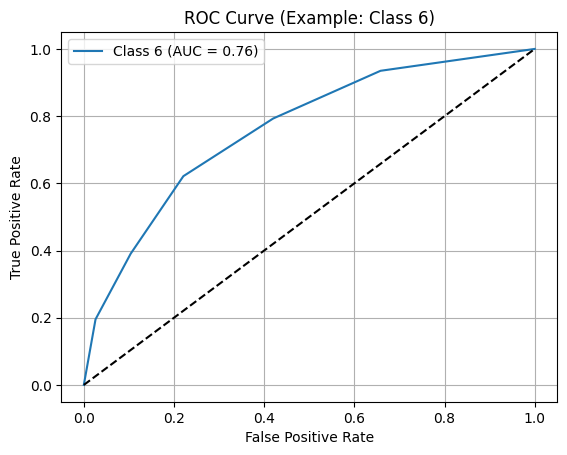

Accuracy: 0.5725
Precision (Macro): 0.2729
Recall (Macro): 0.2794
F1 Score (Macro): 0.2755
Mean Squared Error: 0.6600


In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve, mean_squared_error
)
from sklearn.preprocessing import label_binarize

# Load dataset
data = pd.read_csv("/content/drive/MyDrive/wineQualityReds.csv")

# Drop the unnamed index column
data = data.iloc[:, 1:]

# Split features and target
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values

# Split into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)

# Predictions
Y_pred = knn.predict(X_test)

# Accuracy
accuracy = accuracy_score(Y_test, Y_pred)

# Precision, Recall, F1 (macro average for multiclass)
precision = precision_score(Y_test, Y_pred, average='macro')
recall = recall_score(Y_test, Y_pred, average='macro')
f1 = f1_score(Y_test, Y_pred, average='macro')

# Confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", cm)

# Mean Squared Error
mse = mean_squared_error(Y_test, Y_pred)

# Specificity calculation (per class)
def calculate_specificity(cm):
    FP = cm.sum(axis=0) - np.diag(cm)
    TN = cm.sum() - (FP + cm.sum(axis=1) - np.diag(cm) + np.diag(cm))
    specificity = TN / (TN + FP)
    return specificity

specificity = calculate_specificity(cm)
print("Specificity (per class):", specificity)

# AUC-ROC (binarizing labels for multiclass)
Y_test_bin = label_binarize(Y_test, classes=np.unique(Y))
Y_score = knn.predict_proba(X_test)

# Compute AUC ROC score
auc_score = roc_auc_score(Y_test_bin, Y_score, multi_class="ovr")
print(f"AUC-ROC Score: {auc_score:.4f}")

# ROC Curve for one class example (e.g., class "6")
fpr, tpr, _ = roc_curve(Y_test_bin[:, 2], Y_score[:, 2])  # assuming "6" is at index 2
plt.plot(fpr, tpr, label="Class 6 (AUC = {:.2f})".format(roc_auc_score(Y_test_bin[:, 2], Y_score[:, 2])))
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve (Example: Class 6)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

# Displaying all results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Macro): {precision:.4f}")
print(f"Recall (Macro): {recall:.4f}")
print(f"F1 Score (Macro): {f1:.4f}")
print(f"Mean Squared Error: {mse:.4f}")


Confusion Matrix:
 [[  0   0   1   1   0   0]
 [  0   0   9   4   0   0]
 [  0   0 123  46   1   0]
 [  0   0  41 110   9   0]
 [  0   0   2  24  23   1]
 [  0   0   0   4   0   1]]
Specificity per class: [1.         1.         0.76956522 0.67083333 0.97142857 0.99746835]
AUC-ROC Score (OvR): 0.7674


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


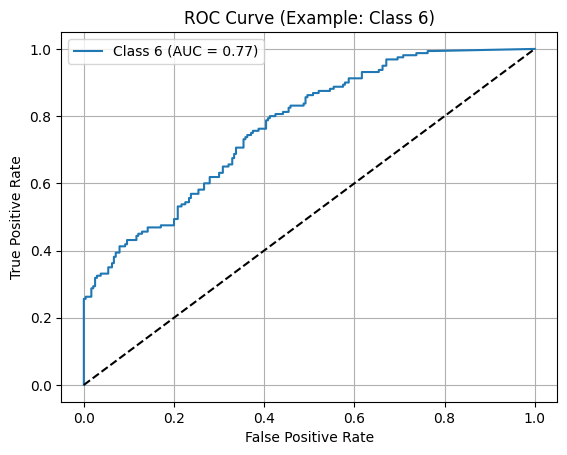


Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'distance'}
Accuracy: 0.6425
Precision (Macro): 0.4130
Recall (Macro): 0.3452
F1 Score (Macro): 0.3635
Mean Squared Error: 0.4675


In [3]:
# 1. Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn tools
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve, mean_squared_error
)

# 2. Load and clean data
data = pd.read_csv("/content/drive/MyDrive/wineQualityReds.csv")
data = data.iloc[:, 1:]  # Remove index column

# 3. Split into features (X) and target (Y)
X = data.drop('quality', axis=1).values
Y = data['quality'].values

# 4. Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.25, random_state=42, stratify=Y
)

# 5. Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 6. Hyperparameter tuning using GridSearchCV to increase accuracy
param_grid = {
    'n_neighbors': range(3, 21),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, Y_train)
knn_best = grid_search.best_estimator_

# 7. Predictions
Y_pred = knn_best.predict(X_test)

# 8. Evaluation metrics
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='macro')
recall = recall_score(Y_test, Y_pred, average='macro')
f1 = f1_score(Y_test, Y_pred, average='macro')
mse = mean_squared_error(Y_test, Y_pred)

# 9. Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", cm)

# 10. Specificity calculation
def calculate_specificity(cm):
    FP = cm.sum(axis=0) - np.diag(cm)
    TN = cm.sum() - (FP + cm.sum(axis=1) - np.diag(cm) + np.diag(cm))
    specificity = TN / (TN + FP)
    return specificity

specificity = calculate_specificity(cm)
print("Specificity per class:", specificity)

# 11. AUC-ROC Score
Y_test_bin = label_binarize(Y_test, classes=np.unique(Y))
Y_score = knn_best.predict_proba(X_test)
auc_score = roc_auc_score(Y_test_bin, Y_score, multi_class='ovr')
print(f"AUC-ROC Score (OvR): {auc_score:.4f}")

# 12. ROC Curve for one class (e.g., class 6)
class_index = list(np.unique(Y)).index(6)
fpr, tpr, _ = roc_curve(Y_test_bin[:, class_index], Y_score[:, class_index])
plt.plot(fpr, tpr, label="Class 6 (AUC = {:.2f})".format(roc_auc_score(Y_test_bin[:, class_index], Y_score[:, class_index])))
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve (Example: Class 6)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

# 13. Final output
print(f"\nBest KNN Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Macro): {precision:.4f}")
print(f"Recall (Macro): {recall:.4f}")
print(f"F1 Score (Macro): {f1:.4f}")
print(f"Mean Squared Error: {mse:.4f}")


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import RobustScaler, PowerTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingClassifier

# Load and clean data
data = pd.read_csv("/content/drive/MyDrive/wineQualityReds.csv")
data = data.iloc[:, 1:]  # Remove index column

# Enhanced target processing - merge rare classes more aggressively
def simplify_labels(y):
    y = np.where(y <= 5, 5, y)  # merge 3,4,5 → 5
    y = np.where(y == 6, 6, y)
    y = np.where(y >= 7, 7, y)  # merge 7,8 → 7
    return y

X = data.drop('quality', axis=1).values
Y = simplify_labels(data['quality'].values)

# Add these before the train-test split
data['total_acidity'] = data['fixed.acidity'] + data['volatile.acidity']
data['sulfur_ratio'] = data['free.sulfur.dioxide'] / (data['total.sulfur.dioxide'] + 1e-6)
data['alcohol_acidity_ratio'] = data['alcohol'] / (data['volatile.acidity'] + 0.1)


# Train-test split with stratification
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y  # Reduced test size
)

def simplify_labels(y):
    return np.where(y < 6, 0, np.where(y == 6, 1, 2))  # 3-class system

# Enhanced preprocessing pipeline
preprocessor = make_pipeline(
    PowerTransformer(method='yeo-johnson'),  # Handle skewed features
    RobustScaler()  # Better with outliers than StandardScaler
)
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Dimensionality reduction with PCA
pca = PCA(n_components=0.95)  # Keep 95% variance
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

bagging_knn = BaggingClassifier(
    base_estimator=best_knn,
    n_estimators=10,
    random_state=42
)
bagging_knn.fit(X_train, Y_train)
Y_pred = bagging_knn.predict(X_test)

# Class balancing with SMOTE
smote = SMOTE(random_state=42, sampling_strategy='auto')
X_train, Y_train = smote.fit_resample(X_train, Y_train)

# Expanded hyperparameter grid
param_grid = {
    'n_neighbors': range(3, 31, 2),  # Odd numbers only
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'cosine'],  # Added cosine
    'algorithm': ['auto', 'ball_tree', 'kd_tree'],
    'leaf_size': [10, 20, 30, 40],
    'p': [1, 2, 3]  # For Minkowski metric
}

# More rigorous cross-validation
grid_search = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=StratifiedKFold(n_splits=10),  # More folds
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, Y_train)

# Best model evaluation
best_knn = grid_search.best_estimator_
Y_pred = best_knn.predict(X_test)

# Enhanced evaluation metrics
accuracy = accuracy_score(Y_test, Y_pred)
print(f"\nBest Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))

# Improved confusion matrix visualization
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['5', '6', '7'],
            yticklabels=['5', '6', '7'])
plt.xlabel('Predicted Quality')
plt.ylabel('Actual Quality')
plt.title('Confusion Matrix')
plt.show()

TypeError: BaggingClassifier.__init__() got an unexpected keyword argument 'base_estimator'

Fitting 10 folds for each of 3024 candidates, totalling 30240 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
6720 fits failed out of a total of 30240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3360 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py", line 239, in fit
    return self._


Best Parameters: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'cosine', 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Accuracy: 0.6625

Classification Report:
               precision    recall  f1-score   support

           5       0.80      0.74      0.77       149
           6       0.64      0.49      0.56       128
           7       0.46      0.88      0.60        43

    accuracy                           0.66       320
   macro avg       0.63      0.71      0.64       320
weighted avg       0.69      0.66      0.66       320



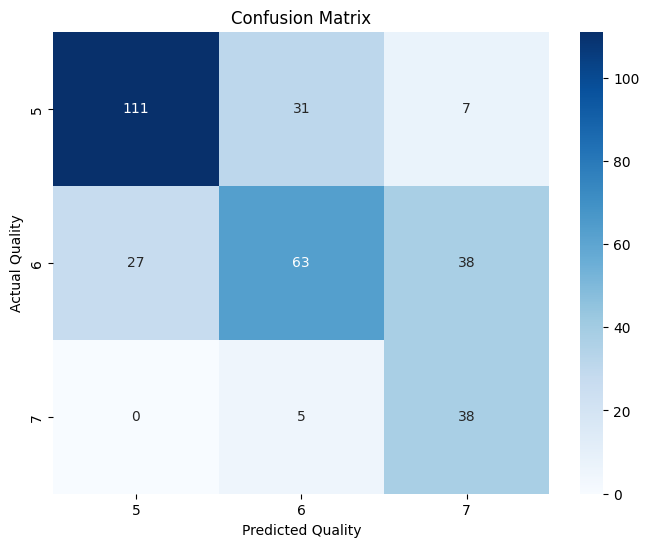

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import RobustScaler, PowerTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingClassifier

# Load and clean data
data = pd.read_csv("/content/drive/MyDrive/wineQualityReds.csv")
data = data.iloc[:, 1:]  # Remove index column

# Enhanced target processing
def simplify_labels(y):
    y = np.where(y <= 5, 5, y)  # merge 3,4,5 → 5
    y = np.where(y == 6, 6, y)
    y = np.where(y >= 7, 7, y)  # merge 7,8 → 7
    return y

# Feature engineering
data['total_acidity'] = data['fixed.acidity'] + data['volatile.acidity']
data['sulfur_ratio'] = data['free.sulfur.dioxide'] / (data['total.sulfur.dioxide'] + 1e-6)
data['alcohol_acidity_ratio'] = data['alcohol'] / (data['volatile.acidity'] + 0.1)

X = data.drop('quality', axis=1).values
Y = simplify_labels(data['quality'].values)

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)

# Preprocessing pipeline
preprocessor = make_pipeline(
    PowerTransformer(method='yeo-johnson'),
    RobustScaler()
)
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# PCA
pca = PCA(n_components=0.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# SMOTE
smote = SMOTE(random_state=42)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

# KNN tuning
param_grid = {
    'n_neighbors': range(3, 31, 2),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'cosine'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree'],
    'leaf_size': [10, 20, 30, 40],
    'p': [1, 2, 3]
}

grid_search = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=StratifiedKFold(n_splits=10),
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, Y_train)
best_knn = grid_search.best_estimator_

# Bagging
bagging_knn = BaggingClassifier(
    estimator=best_knn,
    n_estimators=10,
    random_state=42,
    n_jobs=-1
)
bagging_knn.fit(X_train, Y_train)
Y_pred = bagging_knn.predict(X_test)

# Evaluation
accuracy = accuracy_score(Y_test, Y_pred)
print(f"\nBest Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))

# Confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['5', '6', '7'],
            yticklabels=['5', '6', '7'])
plt.xlabel('Predicted Quality')
plt.ylabel('Actual Quality')
plt.title('Confusion Matrix')
plt.show()

Fitting 5 folds for each of 1092 candidates, totalling 5460 fits

Best Parameters: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Accuracy: 0.6687

Classification Report:
               precision    recall  f1-score   support

           5       0.78      0.72      0.75       149
           6       0.63      0.57      0.60       128
           7       0.50      0.79      0.61        43

    accuracy                           0.67       320
   macro avg       0.64      0.69      0.65       320
weighted avg       0.68      0.67      0.67       320



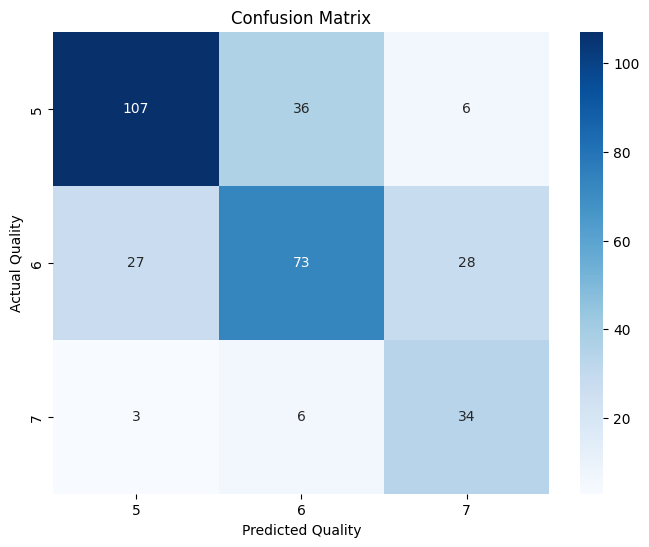

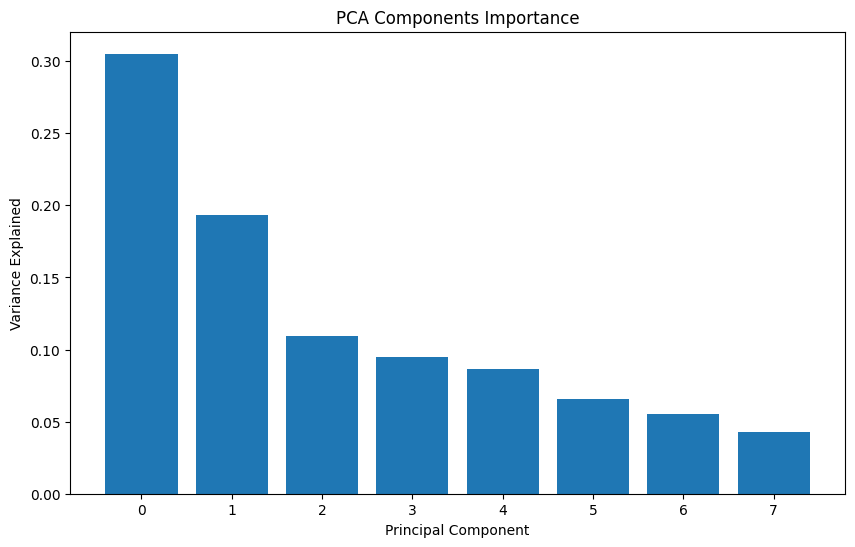

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import RobustScaler, PowerTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

# Load and clean data
data = pd.read_csv("/content/drive/MyDrive/wineQualityReds.csv")
data = data.iloc[:, 1:]  # Remove index column

# Enhanced target processing - more balanced classes
def simplify_labels(y):
    y = np.where(y <= 5, 5, y)  # merge 3,4,5 → 5
    y = np.where(y == 6, 6, y)
    y = np.where(y >= 7, 7, y)  # merge 7,8 → 7
    return y

# Feature engineering
data['total_acidity'] = data['fixed.acidity'] + data['volatile.acidity']
data['sulfur_ratio'] = data['free.sulfur.dioxide'] / (data['total.sulfur.dioxide'] + 1e-6)
data['alcohol_acidity_ratio'] = data['alcohol'] / (data['volatile.acidity'] + 0.1)

X = data.drop('quality', axis=1).values
Y = simplify_labels(data['quality'].values)

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)

# Preprocessing pipeline
preprocessor = PowerTransformer(method='yeo-johnson')  # Handle skewed features
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

scaler = RobustScaler()  # Better with outliers than StandardScaler
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# PCA - keep most important features
pca = PCA(n_components=0.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# SMOTE for class balancing
smote = SMOTE(random_state=42)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

# Corrected hyperparameter grid - removed incompatible metric-algorithm combinations
param_grid = [
    {
        'n_neighbors': range(3, 31, 2),
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree'],
        'leaf_size': [10, 20, 30],
        'p': [1, 2]
    },
    {
        'n_neighbors': range(3, 31, 2),
        'weights': ['uniform', 'distance'],
        'metric': ['cosine'],
        'algorithm': ['brute'],  # Cosine only works with brute force
        'leaf_size': [10, 20, 30]
    }
]

grid_search = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=StratifiedKFold(n_splits=5),  # Reduced from 10 to speed up
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, Y_train)
best_knn = grid_search.best_estimator_

# Evaluation
Y_pred = best_knn.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f"\nBest Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))

# Confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['5', '6', '7'],
            yticklabels=['5', '6', '7'])
plt.xlabel('Predicted Quality')
plt.ylabel('Actual Quality')
plt.title('Confusion Matrix')
plt.show()

# Feature importance from PCA
plt.figure(figsize=(10,6))
plt.bar(range(pca.n_components_), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('PCA Components Importance')
plt.show()